import numpy as np
import astropy.units as u
from specutils import Spectrum1D, SpectralRegion
from astropy.io import fits
from specutils.manipulation import noise_region_uncertainty
import matplotlib.pyplot as plt
from specutils.fitting import find_lines_threshold
import specutils
from specutils.fitting import find_lines_derivative
from scipy import signal

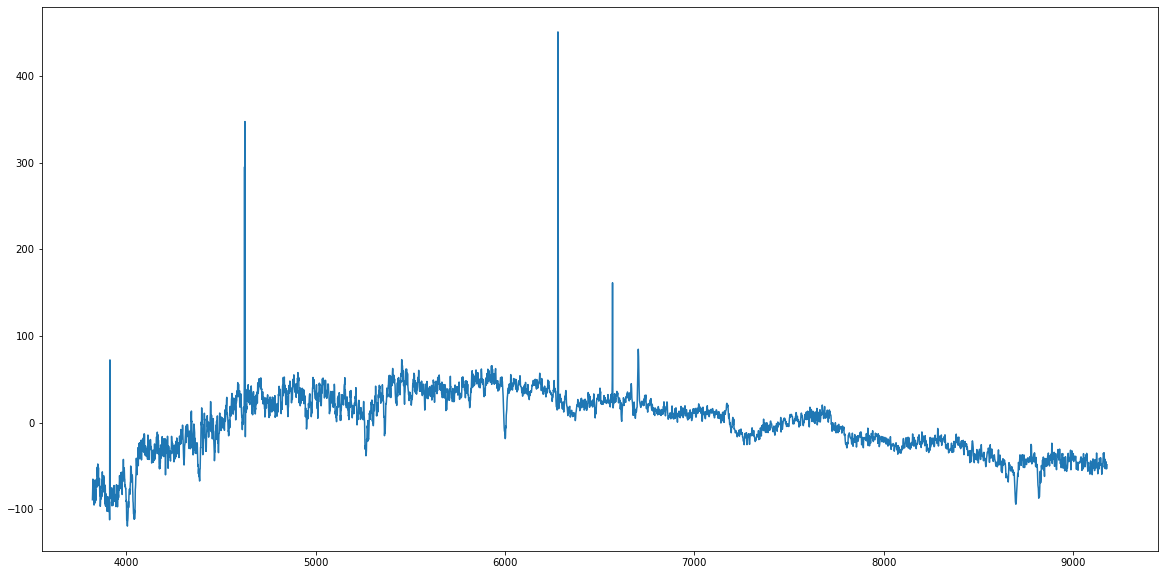

In [230]:
spec=fits.open('spectable_0_galname_NGC5406.fits')
get_spectra=spec[1].data
get_spectra['flux']=signal.detrend(get_spectra['flux'])
plt.figure(figsize=(20,10))
plt.plot(10**get_spectra['loglam'],(get_spectra['flux']))

In [238]:
lower=3.85
higher=3.91
spectrum = Spectrum1D(flux=get_spectra['flux']*u.AA, 
                      spectral_axis=get_spectra['loglam']*u.AA)
noise_region = SpectralRegion(lower*u.AA, higher*u.AA)
spectrum = noise_region_uncertainty(spectrum, noise_region)

lines = find_lines_derivative(spectrum,flux_threshold=30)

emission=np.array(lines[lines['line_type'] == 'emission']['line_center'])
absorption=np.array(lines[lines['line_type'] == 'absorption']['line_center'])
#emission=np.array(lines['line_center'])
new_spectra=get_spectra[np.isin(get_spectra['loglam'],absorption)]


If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning. [specutils.analysis.flux]


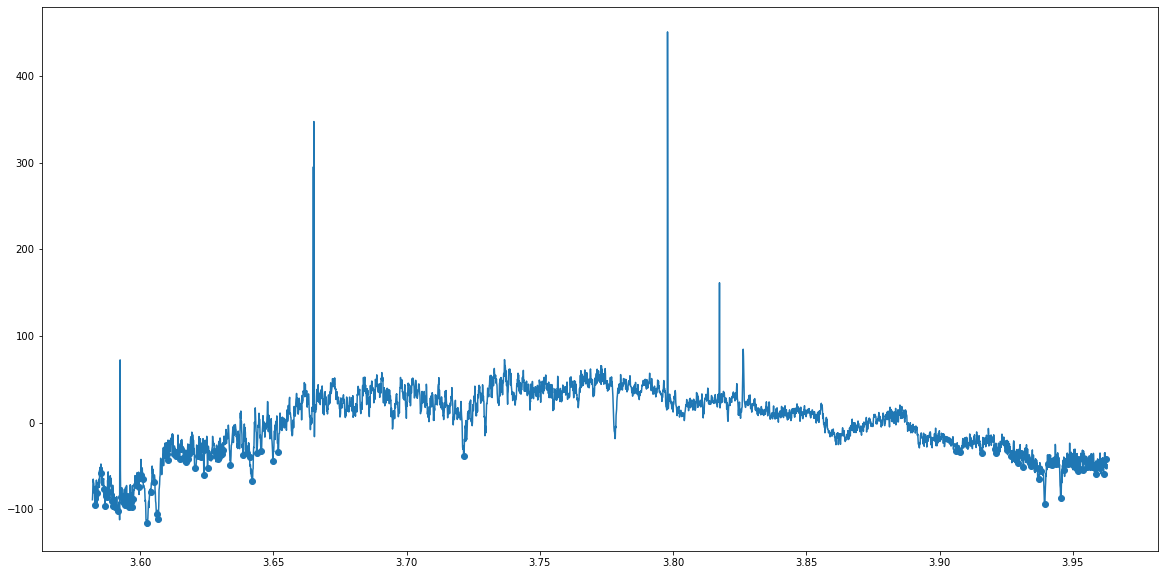

In [239]:
plt.figure(figsize=(20,10))
plt.plot(get_spectra['loglam'], (get_spectra['flux']))
plt.scatter(new_spectra['loglam'],(new_spectra['flux']))

In [240]:
lines

line_center,line_type,line_center_index
Angstrom,,
float32,str10,int64
3.592400074005127,emission,103
3.6612000465393066,emission,791
3.661600112915039,emission,795
3.6623001098632812,emission,802
3.663100004196167,emission,810
3.6651999950408936,emission,831
3.666300058364868,emission,842
3.6677000522613525,emission,856
